In [2]:
# Imports
import string
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ling\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Load data
#df =pd.read_csv('data.csv')
df = pd.read_csv('C:/Users/Thao My/data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Thao My/data.csv'

# Part 1 – Data Preparation and Preprocessing. [15 points]

### 1. Describe the dataset. (8 points)

In [5]:
print(f"The Dataset consists of: {df.shape[0]} rows and {df.shape[1]} columns")
df.head(10)

The Dataset consists of: 318477 rows and 13 columns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,37404301,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [7]:
#Get the number of variations for each attribute
df.nunique()

Id                   318477
Title                168065
Company               40628
Date                    163
Location                 65
Area                     19
Classification           30
SubClassification       338
Requirement          234287
FullDescription      250901
LowestSalary             11
HighestSalary            11
JobType                   4
dtype: int64

In [8]:
#period and job posting dates

#fix the data type
df['Date'] = pd.to_datetime(df.Date)

#find the period and unique dates
dates = df.sort_values('Date')['Date'].dropna().unique()
start_date = dates[0]
end_date = dates[len(dates)-1]

print("The period covers by the data:")
print(f"Start date: {start_date}")
print(f"End date: {end_date}")
print(f"Number of different dates have job postings: {len(dates)}")

The period covers by the data:
Start date: 2018-10-01 00:00:00+00:00
End date: 2019-03-13 00:00:00+00:00
Number of different dates have job postings: 163


In [9]:
#location inspect
location = df['Location'].value_counts().reset_index()
location.columns = ['Location', 'Total of Job Postings']
top_loc = location.iloc[0]

print(f"Number of locations: {len(location)}")
print(f"Location with most job postings: {top_loc['Location']} with {top_loc['Total of Job Postings']} job postings")
location

Number of locations: 65
Location with most job postings: Sydney with 60765 job postings


,Location,Total of Job Postings
0,Sydney,60765
1,Melbourne,46690
2,Brisbane,21466
3,Perth,13198
4,Adelaide,6653
...,...,...
60,Yorke Peninsula & Clare Valley,96
61,"Tumut, Snowy & Monaro",86
62,Somerset & Lockyer,65
63,Fleurieu Peninsula & Kangaroo Island,64


In [10]:
#Job sectors
job_sector = df['Classification'].value_counts().reset_index()
job_sector.columns = ['Classification', 'Total of Job Postings']
print('Number of job sectors:', len(job_sector))
job_sector

Number of job sectors: 30


,Classification,Total of Job Postings
0,Information & Communication Technology,22796
1,Trades & Services,17976
2,Healthcare & Medical,17085
3,Hospitality & Tourism,15523
4,"Manufacturing, Transport & Logistics",12376
5,Administration & Office Support,10020
6,Accounting,9368
7,Education & Training,9280
8,Construction,8372
9,Sales,8119


In [11]:
#ICT Sub-Sectors
ict_sector = df[df['Classification']=='Information & Communication Technology']
ict_sub_sector = ict_sector['SubClassification'].value_counts().reset_index()
ict_sub_sector.columns = ['SubClassification', 'Total of Job Postings']
print('Number of sub-sectors in ICT:', len(ict_sector))
ict_sub_sector

Number of sub-sectors in ICT: 22796


,SubClassification,Total of Job Postings
0,Developers/Programmers,4211
1,Business/Systems Analysts,2986
2,Programme & Project Management,2413
3,Architects,1548
4,Engineering - Software,1437
5,Help Desk & IT Support,1374
6,Networks & Systems Administration,1194
7,Consultants,1149
8,Other,997
9,Testing & Quality Assurance,831


In [12]:
#Salary Range
lowest_salary = df['LowestSalary'].value_counts().to_frame('Total of Job Postings')
lowest_salary = lowest_salary.sort_index()

highest_salary = df['HighestSalary'].value_counts().to_frame('Total of Job Postings')
highest_salary = highest_salary.sort_index(ascending=False)

print("Salary Range:", '\n')
print(lowest_salary, '\n')
print(highest_salary)

Salary Range: 

              Total of Job Postings
LowestSalary                       
0                             62639
30                            23476
40                            34436
50                            27027
60                            28499
70                            28712
80                            24249
100                           27673
120                           24514
150                           25841
200                           11411 

               Total of Job Postings
HighestSalary                       
999                            11411
200                            25841
150                            24514
120                            27673
100                            24249
80                             28712
70                             28499
60                             27027
50                             34436
40                             23476
30                             62639


In [13]:
#Job types & their salary range
df.groupby('JobType').agg({'LowestSalary':'min','HighestSalary':'max'})

,LowestSalary,HighestSalary
JobType,,
Casual/Vacation,0,999
Contract/Temp,0,999
Full Time,0,999
Part Time,0,999


### 2. Normalize and clean data. (7 points) 

#### Average Salary

In [14]:
#Calculate "Average Salary"
df['AverageSalary'] = (df['LowestSalary']+df['HighestSalary'])/2
classification_avg_salary = df.groupby('Classification').agg({'AverageSalary': 'count'}).sort_values(by='AverageSalary', ascending=True)
classification_avg_salary

,AverageSalary
Classification,
Self Employment,93
"Advertising, Arts & Media",833
CEO & General Management,844
"Farming, Animals & Conservation",882
Science & Technology,905
Sport & Recreation,984
Consulting & Strategy,1206
Insurance & Superannuation,1474
Design & Architecture,1811


#### Data Format (date & id)

In [15]:
#Remove unnecessary characters in Id values and keep 8 number int 
df['Id'] = df['Id'].astype(str).str.extract(r'(\d{8})')
df['Id'].sort_values()

164335    31671087
155189    36018079
193509    36274131
189779    36274131
162347    36501930
            ...   
318408    38565408
318368    38565544
318353    38565720
318421    38565789
318399    38566133
Name: Id, Length: 318477, dtype: object

In [16]:
#Remove time in the "Date" column
df['Date'] = df['Date'].dt.date
df['Date']

0         2018-10-07
1         2018-10-07
2         2018-10-07
3         2018-10-07
4         2018-10-07
             ...    
318472    2019-03-13
318473    2019-03-13
318474    2019-03-12
318475    2019-03-08
318476    2019-03-13
Name: Date, Length: 318477, dtype: object

In [17]:
df['Id'] = pd.to_numeric(df['Id'])
df['Date'] = pd.to_datetime(df['Date'])

print(f"Id type: {df['Id'].dtypes}")
print(f"Date type: {df['Date'].dtypes}")

Id type: int64
Date type: datetime64[ns]


#### Duplicates

In [18]:
#Check for duplicates in dataset
duplicate_count = df[df.duplicated()].shape[0]
print(f"Duplicates found: {duplicate_count}")

no_dates_id = df.drop(['Date', 'Id'], axis=1)
duplicate_count_no_dates_id = no_dates_id[no_dates_id.duplicated()].shape[0]
difference = duplicate_count_no_dates_id - duplicate_count
print(f'Additional duplicates found without regard to timestamp and Id: {difference}')
print(f'Total number of duplicates found: {duplicate_count_no_dates_id}')

Duplicates found: 108
Additional duplicates found without regard to timestamp and Id: 15223
Total number of duplicates found: 15331


In [19]:
#Remove duplicates
df.drop_duplicates(subset=no_dates_id.columns, inplace=True)

#### Missing Data

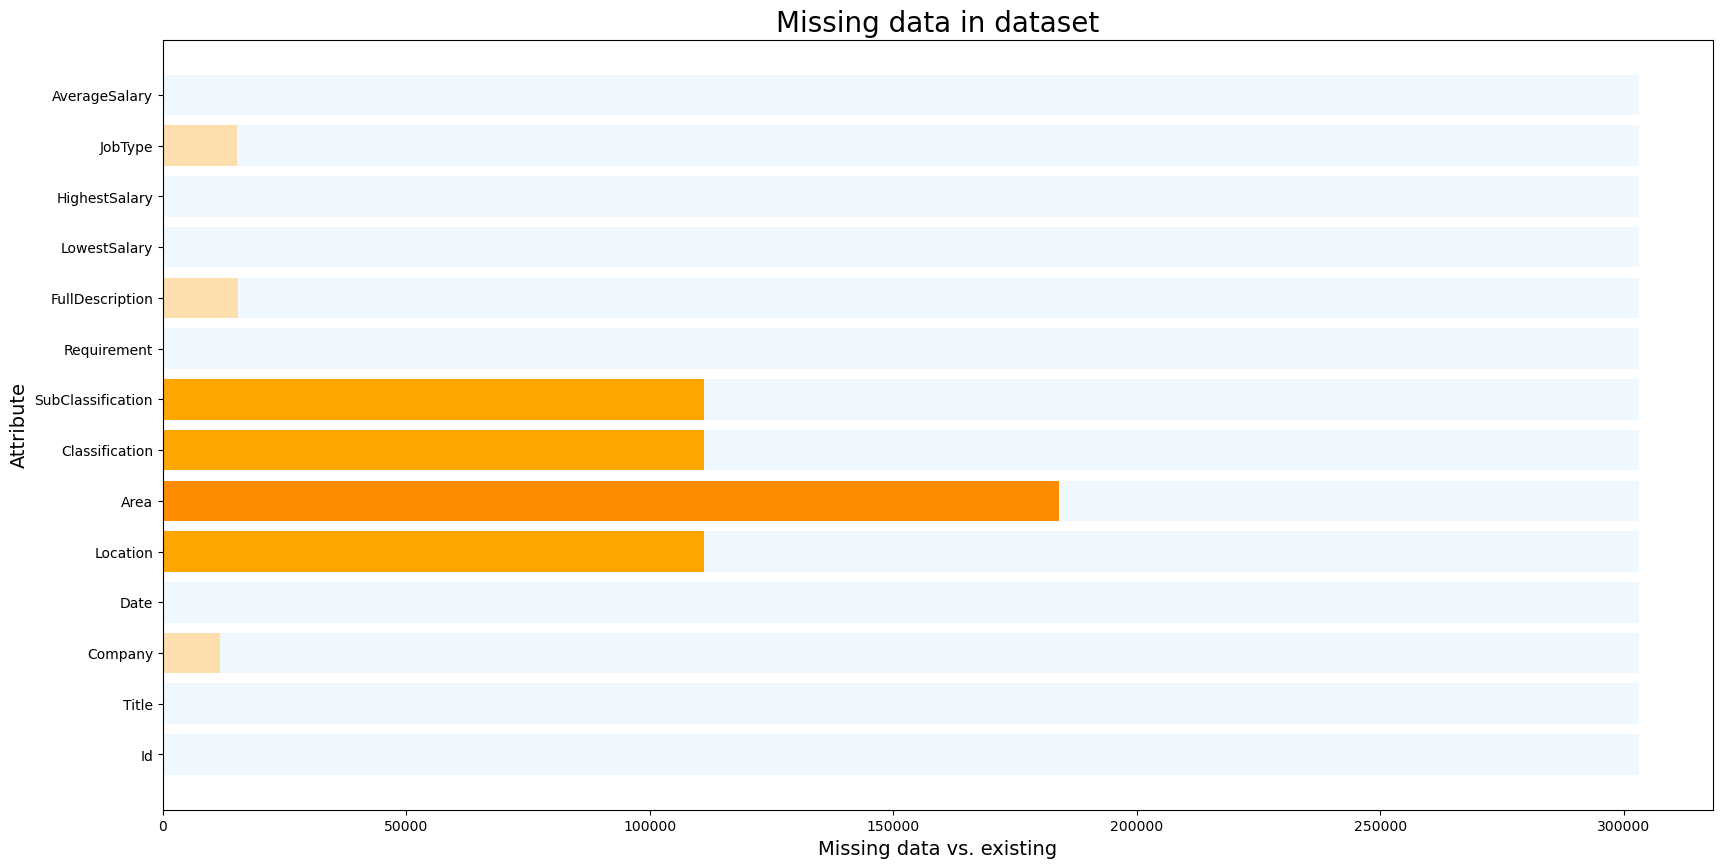

In [21]:
def colorize_bar(value, max_value):
    low, high = max_value * 0.2, max_value * 0.66
    if(value <= low):
        return 'navajowhite'
    elif(value >= high):
        return 'darkorange'
    else:
        return 'orange'

    
nulls = df.isnull().sum()
cols = [colorize_bar(n, nulls.max()) for n in nulls]

total_data = [df.shape[0]] * df.shape[1]

plt.figure(figsize=(20,10))
plt.barh(df.columns.values,total_data, color='aliceblue')
plt.barh(df.columns.values,nulls, color=cols)

plt.ylabel('Attribute', size=14)
plt.xlabel('Missing data vs. existing', size=14)
plt.title('Missing data in dataset', size=20)

plt.show();

# Part 2 – Data Understanding. [5 points]

In [22]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

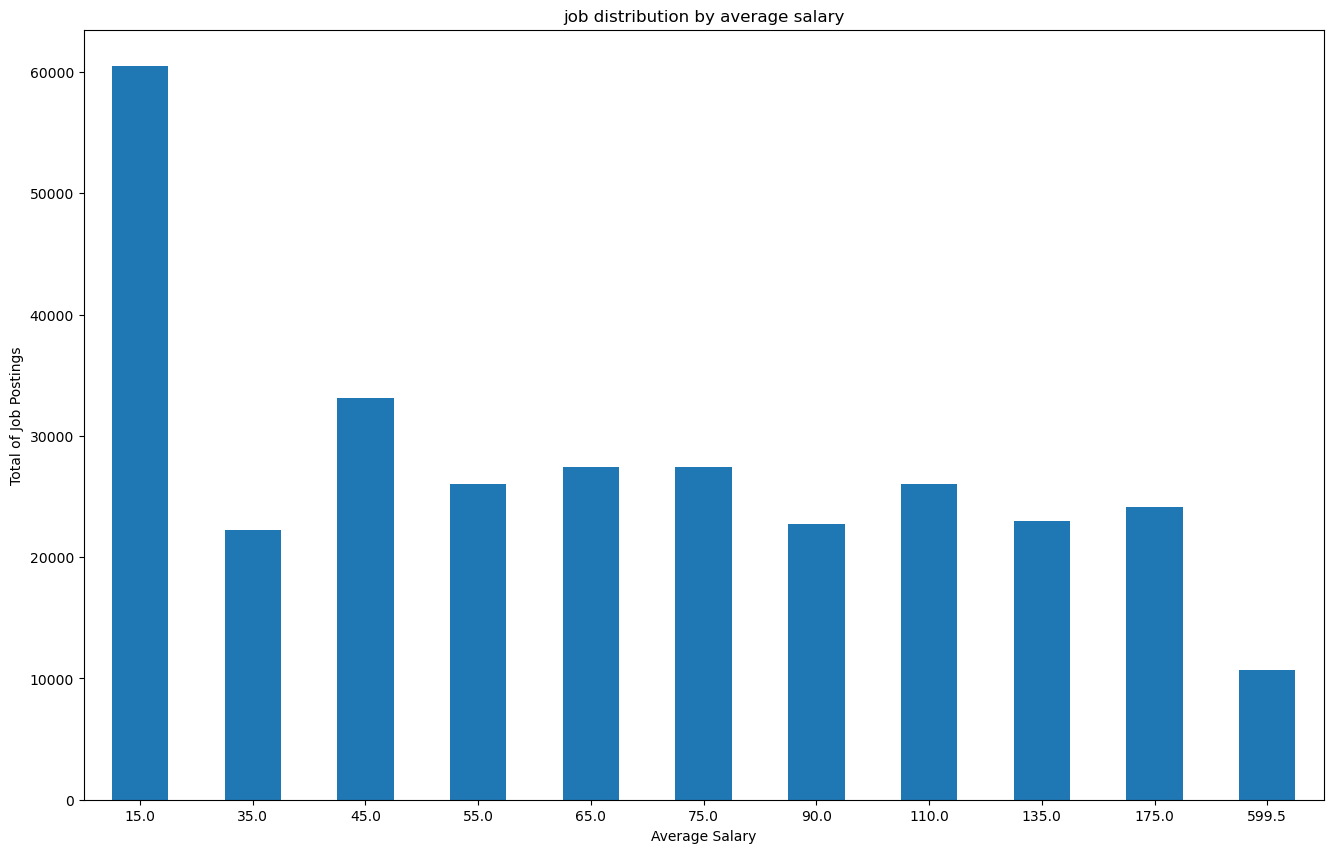

In [23]:
#"AverageSalary" range
plt.figure(figsize=(16,10))
avg_salary = df['AverageSalary'].value_counts().sort_index()

avg_salary.plot(kind='bar')
plt.xlabel('Average Salary')
plt.ylabel('Total of Job Postings')
plt.title('job distribution by average salary')
plt.xticks(rotation=0)

plt.show()

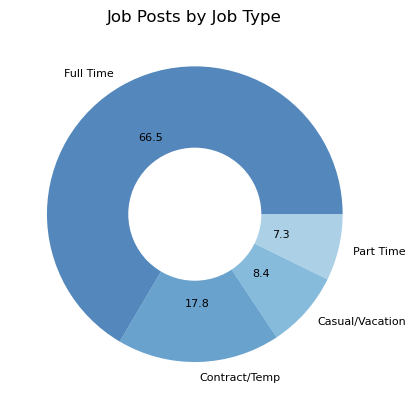

In [24]:
#Job types
job_type = df['JobType'].value_counts().reset_index()
job_type.columns = ['JobType', 'JobPosts']

#pie plot
plt.pie(job_type['JobPosts'], labels=job_type['JobType'], colors=sns.color_palette("Blues_r"),
        wedgeprops={'alpha':0.7}, autopct='%1.1f', textprops=dict(fontsize=8))
plt.title('Job Posts by Job Type')

# draw centre circle to make it a donut
centre_circle = plt.Circle((0,0),0.45, fc='white')
fig = plt.gcf()


# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

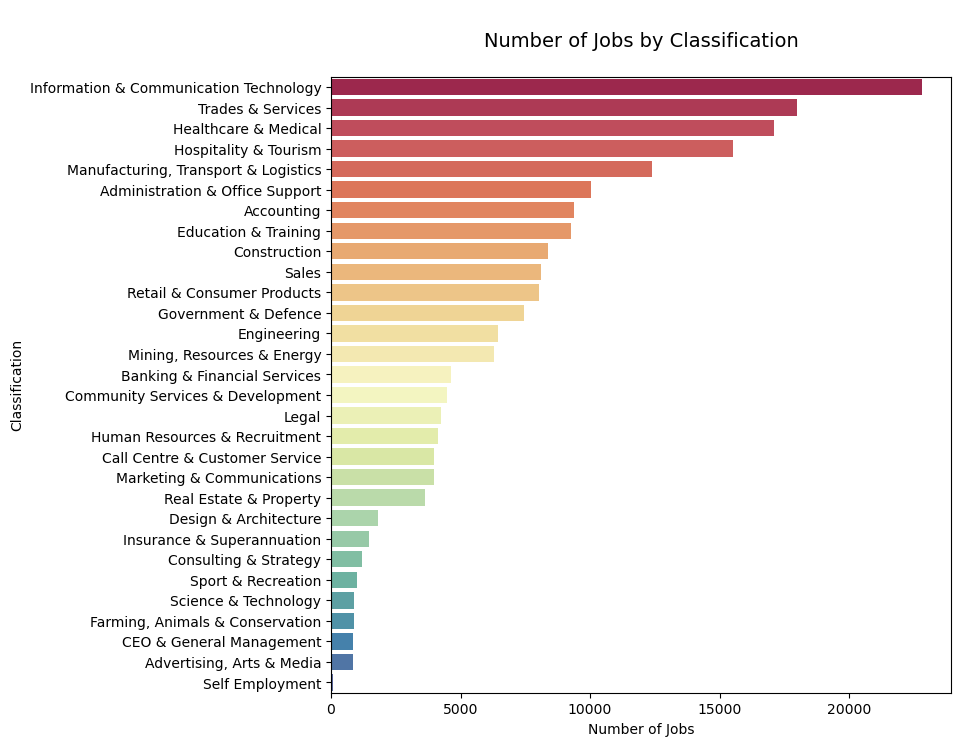

In [25]:
#Job sectors - data: job_sector
plt.figure(figsize=(8,8))
splot = sns.barplot(x=job_sector['Total of Job Postings'], y=job_sector['Classification'], palette='Spectral')
plt.title('\nNumber of Jobs by Classification\n',size=14)
plt.xlabel('Number of Jobs', fontsize=10)
plt.ylabel('Classification', fontsize=10)

#get the color of each classification to reuse later
color_by_classification = dict()
index = 0
for i, row in job_sector.iterrows():
    color_by_classification.update({row['Classification'] : splot.patches[index].get_facecolor()})
    index += 1

plt.show()

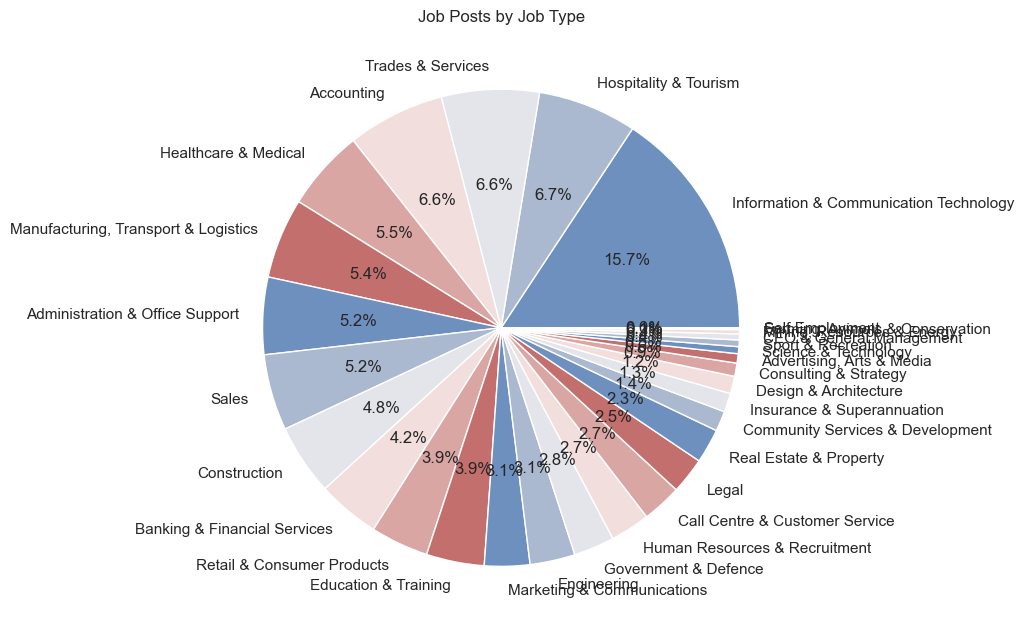

In [114]:
%matplotlib inline

# Pie char for job market share of cities
from matplotlib import cm

# Filter data for selected cities
sydney_data = df[df['Location'] == 'Sydney']

# Sum counts for cities not in the selected list and add as 'Other'
sydney_classification = sydney_data['Classification'].value_counts()

labels = sydney_classification.index
sizes = sydney_classification.values

# Set the style
sns.set_style("white")


# Create a pie chart
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        startangle=0, colors =sns.color_palette("vlag"))


plt.tight_layout()
plt.title('Job Posts by Job Type')
plt.show()

In [115]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.sort_values('Count', ascending=False, inplace=True)
locationDf

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
Sydney,60729,60729,58884,60729,53746,60729,60729,60729,57427,60729,60729,57441,60729,Sydney,60729
Melbourne,46656,46656,44907,46656,41268,46656,46656,46652,43804,46656,46656,43810,46656,Melbourne,46656
Brisbane,21455,21455,20601,21455,17403,21455,21455,21455,20207,21455,21455,20214,21455,Brisbane,21455
Perth,13192,13192,12760,13192,10165,13192,13192,13192,12282,13192,13192,12293,13192,Perth,13192
Adelaide,6650,6650,6300,6650,0,6650,6650,6650,6311,6650,6650,6312,6650,Adelaide,6650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yorke Peninsula & Clare Valley,96,96,94,96,0,96,96,96,90,96,96,90,96,Yorke Peninsula & Clare Valley,96
"Tumut, Snowy & Monaro",86,86,85,86,0,86,86,86,83,86,86,83,86,"Tumut, Snowy & Monaro",86
Somerset & Lockyer,65,65,63,65,0,65,65,65,64,65,65,64,65,Somerset & Lockyer,65


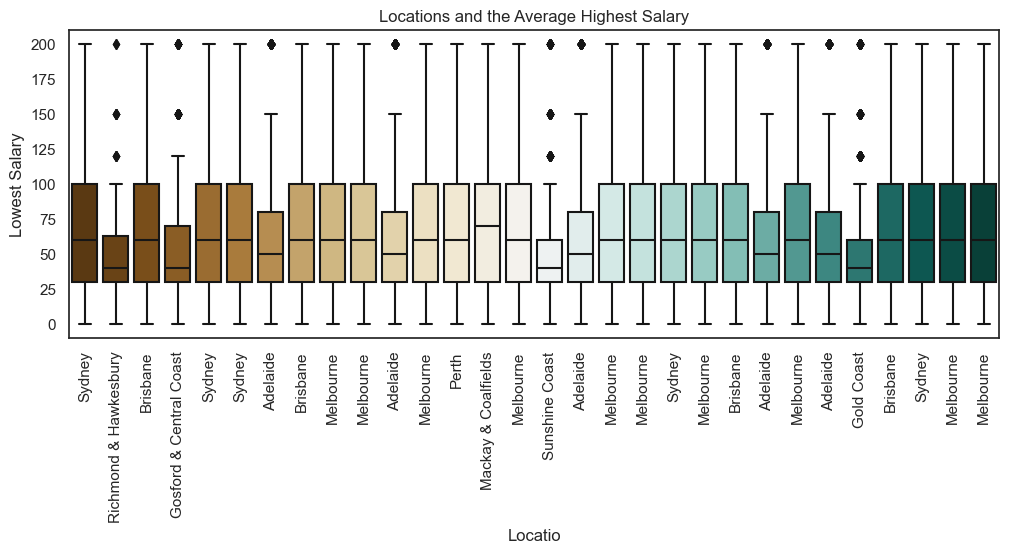

In [116]:
# Visualize the salary distribution for each city using a boxplot chart

plt.figure(figsize=(12, 4))
sns.boxplot(data= df, x='Location', y= 'LowestSalary', order= df['Location'][:30], 
            palette = sns.color_palette("BrBG", n_colors=30))
plt.title("Location and the Distribution of Lowest Salary")
plt.xticks(rotation=90)
plt.title('Locations and the Average Highest Salary')
plt.xlabel('Locatio')
plt.ylabel('Lowest Salary')
plt.show()


# Part 3 – Data Analysis and Visualisation. [6 points]

### 1. Analyse by comparison. (2 points) 

In [6]:
# chosen cities/locations: Sydney and Brisbane

df_sydney = df[df['Location'] == 'Sydney']
df_brisbane = df[df['Location'] == 'Brisbane']

In [ ]:
# total job in each city

print("Total jon in Sydney = ",len(df_sydney))
print("Total jon in Brisbane = ",len(df_brisbane))

In [ ]:
df_sydney["JobType"].value_counts()

In [ ]:
df_brisbane["JobType"].value_counts()

Comment: 

Based on above result, we can see that Sydney has more job than Brisbane. 

In [ ]:
Top5_JobSector_sydney = df_sydney['Classification'].value_counts().head(5)
Top5_JobSector_sydney

In [ ]:
Top5_JobSector_brisbane = df_brisbane['Classification'].value_counts().head(5)
Top5_JobSector_brisbane

In [ ]:
%matplotlib inline

labels = Top5_JobSector_sydney.index
sizes = Top5_JobSector_sydney.values

# Set the style
sns.set_style("white")


# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        startangle=0, colors =sns.color_palette("pastel"))


plt.tight_layout()
plt.title('Top 5 Job Sector in Sydney')
plt.show()

In [ ]:
%matplotlib inline

labels = Top5_JobSector_brisbane.index
sizes = Top5_JobSector_brisbane.values

# Set the style
sns.set_style("white")


# Create a pie chart
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        startangle=0, colors =sns.color_palette("muted"))


plt.tight_layout()
plt.title('Top 5 Job Sector in Sydney')
plt.show()

In [ ]:
df_sydney['AverageSalary'].value_counts()

In [ ]:
df_brisbane['AverageSalary'].value_counts()

In [ ]:
top_5 = df_sydney['Company'].value_counts().head(5)
print("Top 5 companies in Sydney:")
for company in top_5.index:
    sector = df_sydney[df_sydney['Company'] == company]['Classification'].iloc[0]
    print(f"Company: {company}, Sector: {sector}")

In [ ]:
top_5 = df_brisbane['Company'].value_counts().head(5)
print("Top 5 companies in Brisbane:")
for company in top_5.index:
    sector = df_brisbane[df_brisbane['Company'] == company]['Classification'].iloc[0]
    print(f"Company: {company}, Sector: {sector}")

Commnet: 

Sydney is best for employees. 
Sydeney has higher salary compared to brisbane.
Sydney offer more job than brisbane.


### 2. Analyse by time. (2 points) 

### Further attempts to extract seasonality or find a pattern of posting

In [5]:
df =pd.read_csv('data.csv')

C:\Users\ling\AppData\Local\Temp\ipykernel_31716\3523767159.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('data.csv')


In [7]:
temp = df[['Date']]
print("This may take a while...")
temp['DayOfMonth'] = temp['Date'].progress_apply(lambda x: pd.Series(x.day))
temp['DayOfWeek'] = temp['Date'].progress_apply(lambda x: pd.Series(x.dayofweek))
temp['Month'] = temp['Date'].progress_apply(lambda x: pd.Series(x.month))
temp['Week'] = temp['Date'].progress_apply(lambda x: pd.Series(x.week))

## Retrieve truly unique days for averaging purposes
# Label days with their month so that truly unique days can be found
days = temp['Date'].progress_apply(lambda x: pd.Series("{}_{}".format(x.day, x.month)))
day_months = days.iloc[:, 0].unique()
unique_day_count = {}

# Get unique days that data was recorded via retrieving day and month of posting
for day in day_months:
    d_m = day.split('_')
    d = int(d_m[0])
    m = int(d_m[1])
    
    if(d in unique_day_count):
        unique_day_count[d] += 1
    else:
        unique_day_count[d] = 1

This may take a while...


AttributeError: 'Series' object has no attribute 'progress_apply'

In [ ]:
df_location = df[df['Location'].isna()==False]
plt.figure(figsize=(20,8))

# Get job counts per location
df_location_cnts = df_location.groupby('Location').count().reset_index()
df_location_top = df_location_cnts.sort_values(by=['Title'],ascending=False)['Location'].tolist()

# Plot top 5 in different colors
for location in df_location_top[:5]:
    df_current = df[df['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.8, lw=2)

# Plot the rest in light grey
for location in df_location_top[5:]:
    df_current = df_location[df_location['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.4,c='lightgrey')
    
plt.legend(df_location_top[:5], title='Top 5 Cities', frameon=True)
plt.title('Job Posts by Location',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.show()

Conclusion:

Based on the line chart shows that Sydney are the higest

### 3. Forecasting and skill extractions. (2 points) 

In [ ]:
#get dataframe with dates as index
df_timeseries_total = df.groupby(['Date']).count().reset_index().sort_values(by=['Date'])
df_timeseries_total.set_index('Date',inplace=True)

#exclude March because the dataset stops halfway through the month
df_timeseries_total = df_timeseries_total[:151]

# Get the count of jobs over time
df_timeseries_total = df_timeseries_total['Title'].rename('Count')

# Generate moving average over a weekly interval
moving_average_week = df_timeseries_total.rolling(7, min_periods=5)
moving_average_month = df_timeseries_total.rolling(30, min_periods=0)
plot_df = pd.DataFrame({'Count': df_timeseries_total, '7 Day Moving Average': moving_average_week.mean(), '30 Day Moving Average': moving_average_month.mean()})

plt.figure(figsize=(20,8))
plt.plot(plot_df['Count'],alpha=0.8, lw=2)
plt.plot(plot_df['7 Day Moving Average'],linestyle='--', lw=2)
plt.plot(plot_df['30 Day Moving Average'],linestyle='dotted', lw=3)
plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'], frameon=True)
plt.title('Job Posts Over Time',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job posts')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
from wordcloud import WordCloud

classifications = df['Requirement'].dropna().unique()

custom_stopwords = ['store','join', 'looking', 'want', 'site', 'month', 'week', 'level', 'required', 'one', 'end', 'nsw',
                    'positions', 'make', 'across', 'take', 'key', 'large', 'based', 'melbourne', 'staff', 'australia',
                    'position', 'currently', 'full', 'projects', 'north', 'basis', 'next', '12', 'per', 'term', 'program',
                    'home', 'long' 'person', 'agency', 'apply', 'day', 'roles', 'within' 'perth', 'sydney',  'residential',
                    'years', '2019', 'market', 'data', 'exists', 'immediate', 'available', 'officer', 'needed', 'school',
                    'south', 'small', 'cbd', 'year', 'months', 'early', 'life', 'largest', '30', 'part', 'well', 'busy', 'cafe', 'restaurant']

stop_words = stopwords.words('english')
for word in custom_stopwords:
    stop_words.append(word)

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual


def update(Classification="Information & Communication Technology"):
    requirements = df[df['Classification']==Classification]['Requirement'].dropna()
    original_documents = [x.strip() for x in requirements] 

    tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = stop_words, max_features=200)

    features = tfidf.fit(original_documents)
    corpus_tf_idf = tfidf.transform(original_documents) 

    sum_words = corpus_tf_idf.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq_dict = {x: y for x,y in words_freq}
    words_freq_dict.items()
    #print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:5])

    word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
    word_cloud.generate_from_frequencies(words_freq_dict)

    plt.figure(figsize=(16,16))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis("off")
    plt.title('TF-IDF Analysis of Requirements', size=14)
    plt.show()
    
interact(update, Classification=classifications)